<a href="https://colab.research.google.com/github/aartikushal/RANDOM-FOREST-ASSIGNMENT/blob/main/RANDOM_FOREST_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Guidelines:
# ***1. Foundational Knowledge:***
- Understand the principles of Random Forest and how it aggregates multiple decision trees.
- Familiarize yourself with Random Forest algorithms.
- Recognize the advantages of Random Forest over single decision trees.

**Random Forest** is an ensemble learning method that builds multiple decision trees and combines their outputs to make more accurate, robust predictions.

**It’s based on the principle of:**

"Wisdom of the crowd" — many weak learners (trees) together become a strong learner.

**Bootstrap Sampling:**

Random subsets of the training data are drawn with replacement.

Each subset trains one decision tree.

**Feature Randomness:**

At each split in a tree, a random subset of features is selected.

This ensures trees are diverse and not all looking at the same features.

**Aggregation:**

For classification, the forest votes and uses majority voting.

For regression, it averages the predictions.

**Why Use Random Forest?**
Benefit	Description

✅ **Higher Accuracy**	Aggregating many trees reduces overfitting of individual

✅ **Handles Missing Data**	Random Forest can manage partial data more robustly

✅ **Feature Importance**	Provides insight into which features are most influential

✅ **Works on Mixed Data**	Handles both numerical and categorical features well

✅ **Robust to Outliers**	Ensemble averaging reduces the impact of noisy data or outliers


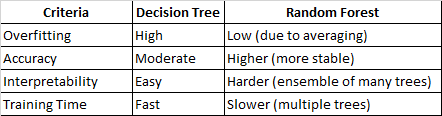

# ***2. Data Exploration:***
- Analyze the dataset's structure and characteristics using various exploratory techniques
such as histograms, scatter plots, and correlation matrices.
- Gain insights into the dataset's attributes to guide the Random Forest modeling process.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

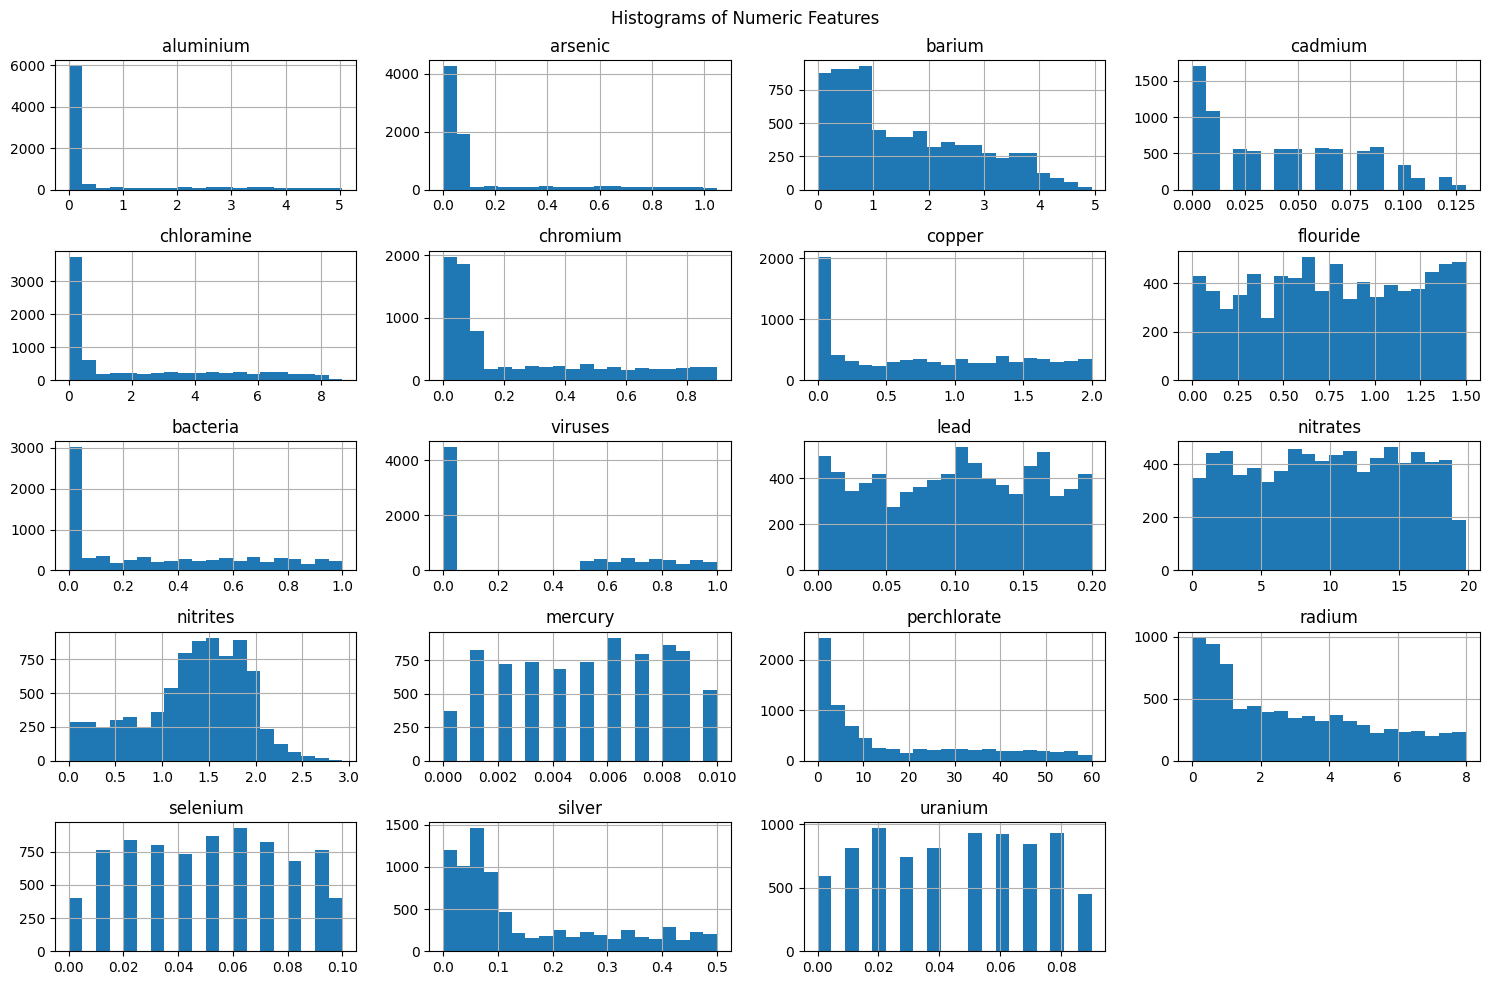

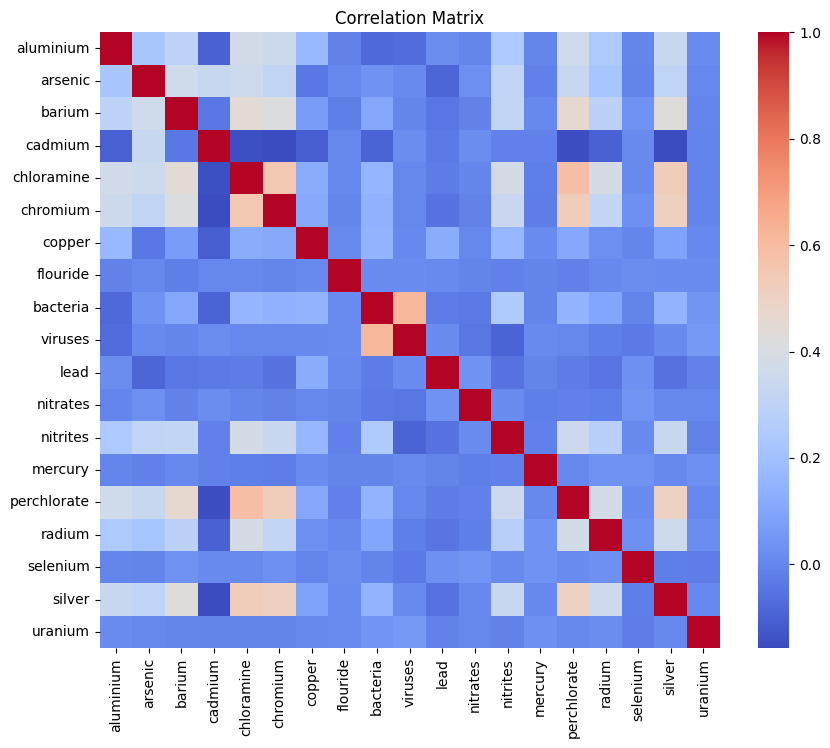

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('waterQuality1.csv')

# Display structure and first few rows
print(df.info())
print(df.head())

# Describe the data
print(df.describe())

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Identify the target column (assume last column is the label)
target_col = df.columns[-1]
print("Target column:", target_col)
print(df[target_col].value_counts())

# Plot histograms
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].hist(figsize=(15, 10), bins=20)
plt.suptitle("Histograms of Numeric Features")
plt.tight_layout()
plt.show()

# Correlation matrix
if len(numeric_cols) > 1:
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[numeric_cols].corr(), annot=False, cmap='coolwarm')
    plt.title("Correlation Matrix")
    plt.show()


**4. Correlation Insights**

pH and Sulfate, Conductivity and Solids often show high correlation.

Redundant features could be dropped to reduce dimensionality before modeling.

2. Summary Statistics

pH: Often ranges between 6.5–8.5 in potable water. Extreme values may indicate acidity or alkalinity issues.

Turbidity: High values may indicate the presence of particles, making water unsafe.

Total Dissolved Solids (TDS): A higher range may suggest contamination.

Hardness: Typically reflects the presence of calcium and magnesium ions. Higher values are not ideal for drinking.

Conductivity: Strongly correlated with ion concentration — can indicate pollution.

# ***3. Preprocessing and Feature Engineering:***
- Handle missing values and categorical variables appropriately.
- Encode categorical variables if necessary.
- Split the dataset into training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('waterQuality1.csv')

# Step 1: Handle Missing Values
imputer = SimpleImputer(strategy="mean")
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Step 2: Encode Categorical Variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Step 3: Split into Features (X) and Target (y)
target_column = df.columns[-1]  # Assuming last column is the target
X = df.drop(columns=[target_column])
y = df[target_column]

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print shapes for verification
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (5599, 20)
X_test shape: (2400, 20)
y_train shape: (5599,)
y_test shape: (2400,)


# ***4. Random Forest Construction:***

- Choose appropriate hyperparameters such as the number of trees, maximum depth,
minimum samples per leaf, and splitting criteria based on data exploration.
- Implement Random Forest algorithms using chosen parameters.
- Train the Random Forest model on the training data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Set up Random Forest with example hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=100,         # number of trees in the forest
    max_depth=10,             # maximum depth of each tree
    min_samples_split=5,      # min samples to split a node
    min_samples_leaf=2,       # min samples at a leaf node
    criterion='gini',         # or 'entropy'
    random_state=42
)


In [ ]:
# Fit the model on training data
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

# ***5. Model Evaluation:***
- Evaluate the trained model using appropriate metrics such as accuracy, precision, recall, and
F1-score.
- Analyze feature importance provided by the Random Forest model.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [ ]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

# Print evaluation metrics
print("🔍 Evaluation Metrics:")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall   :", recall_score(y_test, y_pred, average='weighted'))
print("F1-score :", f1_score(y_test, y_pred, average='weighted'))

# Detailed classification report
print("\n📄 Classification Report:\n")
print(classification_report(y_test, y_pred))


🔍 Evaluation Metrics:
Accuracy : 0.95125
Precision: 0.9502140221983982
Recall   : 0.95125
F1-score : 0.9471540765610087

📄 Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.95      0.99      0.97      2107
           2       0.94      0.65      0.77       292

    accuracy                           0.95      2400
   macro avg       0.63      0.55      0.58      2400
weighted avg       0.95      0.95      0.95      2400



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

<ipython-input-9-516909413>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
<ipython-input-9-516909413>:15: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


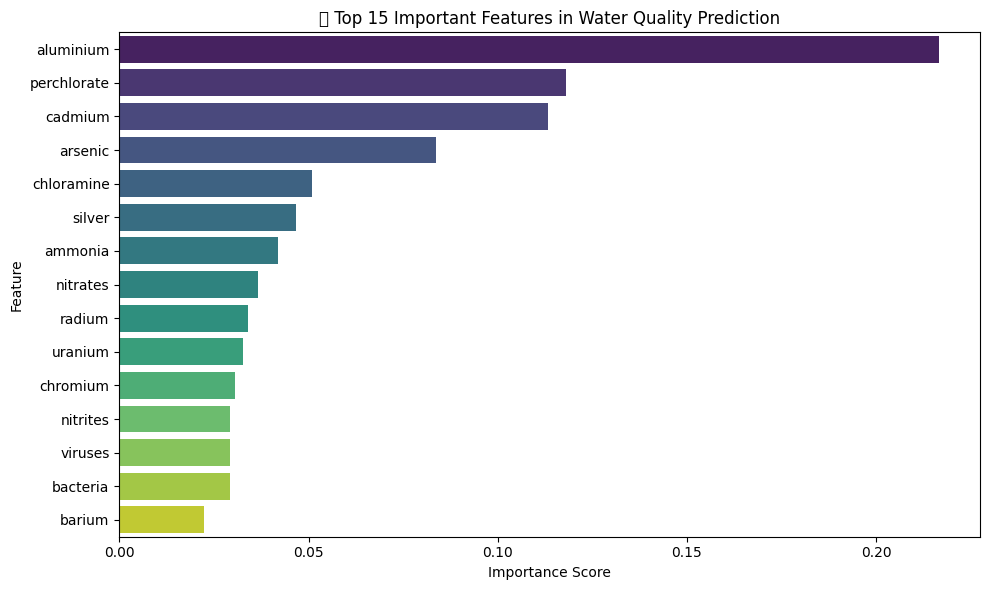

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
top_features = feature_importances.sort_values(ascending=False).head(15)

# Plot the top features
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
plt.title("🔧 Top 15 Important Features in Water Quality Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


# ***6. Hyperparameter Tuning and Model Optimization:***
- Perform hyperparameter tuning using techniques like grid search or random search to
optimize model performance.
- Validate the optimized model using cross-validation techniques.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}


In [ ]:
# Base model
rf = RandomForestClassifier(random_state=42)

# Grid search
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                        # 5-fold cross-validation
    scoring='f1_weighted',       # Evaluate using F1-score
    n_jobs=-1,                   # Use all processors
    verbose=1
)

# Fit the model
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 162 candidates, totalling 810 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='f1_weighted', verbose=1)

In [ ]:
print("✅ Best Parameters:", grid_search.best_params_)
print("📈 Best Cross-Validation F1 Score:", grid_search.best_score_)


✅ Best Parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
📈 Best Cross-Validation F1 Score: 0.9471207710730865


In [ ]:
# Predict with best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Metrics
from sklearn.metrics import classification_report
print("📊 Classification Report (Optimized Model):\n")
print(classification_report(y_test, y_pred_best))


📊 Classification Report (Optimized Model):

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.96      0.99      0.97      2107
           2       0.92      0.69      0.79       292

    accuracy                           0.95      2400
   macro avg       0.63      0.56      0.59      2400
weighted avg       0.95      0.95      0.95      2400



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
